In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Load a pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

# Add global average pooling layer to reduce the feature map to a single 2048 dimensional vector
feature_extractor = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))


94765736/94765736 [==============================] - 1s 0us/step


In [4]:
# Extract features for both training and testing data
train_features = feature_extractor.predict(x_train)
test_features = feature_extractor.predict(x_test)


313/313 [==============================] - 42s 134ms/step


In [5]:
def find_similar_images(index, features, num_results=5):
    # Compute cosine similarity between the selected index and all images
    similarities = cosine_similarity([features[index]], features)[0]

    # Get indices of images with highest similarity scores
    similar_indices = np.argsort(-similarities)[:num_results]

    # Plot similar images
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(similar_indices):
        plt.subplot(1, num_results, i + 1)
        plt.imshow(x_train[idx])
        plt.title(f"Index: {idx}\nScore: {similarities[idx]:.2f}")
        plt.axis('off')
    plt.show()


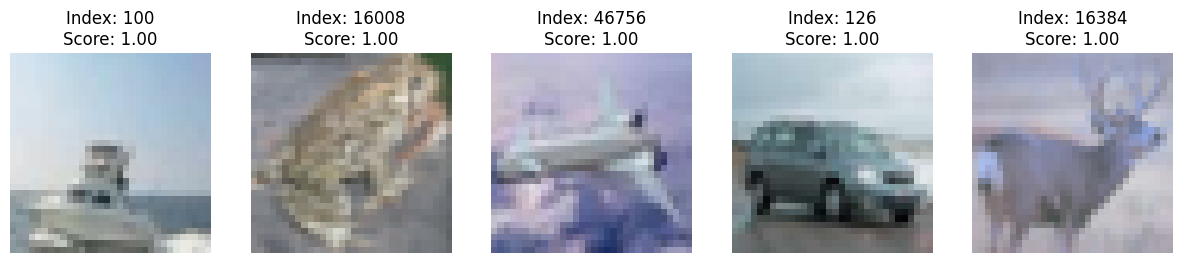

In [6]:
# Example usage: Find images similar to the image at index 100 in the training set
find_similar_images(100, train_features, num_results=5)


[0.       0.       0.       ... 3.142089 0.       0.      ]


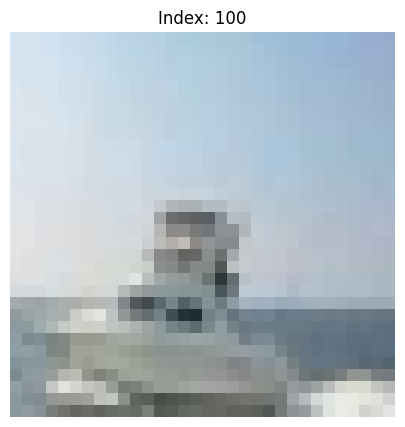

In [8]:
print(train_features[100])

plt.figure(figsize=(15, 5))
plt.imshow(x_train[100])
plt.title(f"Index: {100}")
plt.axis('off')
plt.show()